In [2]:
import pandas as pd

In [64]:
placement_df= pd.read_csv("placement-dataset.csv")

In [65]:
placement_df.sample(10)

,Unnamed: 0,cgpa,iq,placement
61,61,7.3,137.0,1
40,40,4.9,134.0,0
84,84,5.7,169.0,0
36,36,5.7,140.0,0
91,91,7.5,158.0,1
53,53,8.3,168.0,1
39,39,4.6,146.0,0
74,74,6.7,154.0,1
29,29,7.0,112.0,1
88,88,4.4,149.0,0


In [5]:
placement_df.sample(10)

,Unnamed: 0,cgpa,iq,placement
21,21,7.1,151.0,1
67,67,5.0,118.0,0
15,15,5.1,176.0,0
33,33,6.0,149.0,0
29,29,7.0,112.0,1
7,7,5.0,63.0,0
18,18,4.0,100.0,0
30,30,7.6,128.0,1
76,76,4.9,155.0,0
48,48,6.6,138.0,1


In [6]:
placement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
nan_values = placement_df.isnull().sum()

In [8]:
nan_values

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [66]:
import pandas as pd
bins = [3,4,5, 6, 7,8,9 ,float('inf')]  # Adjust the bin edges as needed
labels = ['3 to 4','4 to 5', '5 to 6', '6 to 7', '7 and 8','8 and 9','9 and above']  # Labels for the ranges
placement_df['cpga_range'] = pd.cut(placement_df['cgpa'], bins=bins, labels=labels, right=False)



In [67]:
placement_df['cpga_range']

0      6 to 7
1      5 to 6
2      5 to 6
3     7 and 8
4      5 to 6
       ...   
95     4 to 5
96     4 to 5
97     6 to 7
98     6 to 7
99     6 to 7
Name: cpga_range, Length: 100, dtype: category
Categories (7, object): ['3 to 4' < '4 to 5' < '5 to 6' < '6 to 7' < '7 and 8' < '8 and 9' <
                         '9 and above']

In [68]:
placement_df

,Unnamed: 0,cgpa,iq,placement,cpga_range
0,0,6.8,123.0,1,6 to 7
1,1,5.9,106.0,0,5 to 6
2,2,5.3,121.0,0,5 to 6
3,3,7.4,132.0,1,7 and 8
4,4,5.8,142.0,0,5 to 6
...,...,...,...,...,...
95,95,4.3,200.0,0,4 to 5
96,96,4.4,42.0,0,4 to 5
97,97,6.7,182.0,1,6 to 7
98,98,6.3,103.0,1,6 to 7


In [69]:
sorted_placement_df = placement_df.sort_values(by='cgpa', ascending=True)



In [27]:
sorted_placement_df

,Unnamed: 0,cgpa,iq,placement,cpga_range
17,17,3.3,183.0,0,3 to 4
50,50,3.5,233.0,0,3 to 4
31,31,3.9,109.0,0,3 to 4
18,18,4.0,100.0,0,4 to 5
68,68,4.0,75.0,0,4 to 5
...,...,...,...,...,...
58,58,8.0,79.0,1,8 and 9
37,37,8.1,149.0,1,8 and 9
65,65,8.1,166.0,1,8 and 9
53,53,8.3,168.0,1,8 and 9


In [44]:
sorted_IQ_placement_df = placement_df.sort_values(by='iq', ascending=False)

In [45]:
sorted_IQ_placement_df

,Unnamed: 0,cgpa,iq,placement,cpga_range
50,50,3.5,233.0,0,3 to 4
16,16,5.2,224.0,0,5 to 6
95,95,4.3,200.0,0,4 to 5
26,26,7.0,199.0,1,7 and 8
80,80,4.9,196.0,0,4 to 5
...,...,...,...,...,...
77,77,7.3,50.0,1,7 and 8
5,5,7.1,48.0,1,7 and 8
10,10,6.0,45.0,1,6 to 7
96,96,4.4,42.0,0,4 to 5


In [31]:
placement_counts = placement_df.groupby('cpga_range')['placement'].count().reset_index()


In [62]:
placement_counts

,cpga_range,placement
0,3 to 4,3
1,4 to 5,19
2,5 to 6,24
3,6 to 7,31
4,7 and 8,18
5,8 and 9,5
6,9 and above,0


In [34]:
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<ipython-input-37-7579a198472e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cpga_range', y='placement', data=placement_counts, palette='viridis')


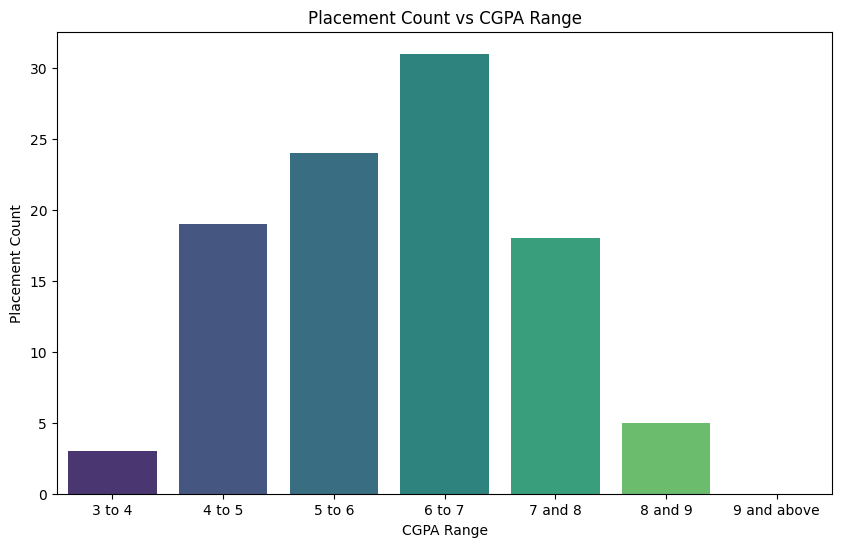

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
placement_counts = placement_df.groupby('cpga_range')['placement'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='cpga_range', y='placement', data=placement_counts, palette='viridis')
plt.xlabel('CGPA Range')
plt.ylabel('Placement Count')
plt.title('Placement Count vs CGPA Range')
plt.show()


In [ ]:
# we see that there is not much impact on cgpa of the student

In [38]:
placement_df

,Unnamed: 0,cgpa,iq,placement,cpga_range
0,0,6.8,123.0,1,6 to 7
1,1,5.9,106.0,0,5 to 6
2,2,5.3,121.0,0,5 to 6
3,3,7.4,132.0,1,7 and 8
4,4,5.8,142.0,0,5 to 6
...,...,...,...,...,...
95,95,4.3,200.0,0,4 to 5
96,96,4.4,42.0,0,4 to 5
97,97,6.7,182.0,1,6 to 7
98,98,6.3,103.0,1,6 to 7


In [70]:
bins_placement = list(range(30, 250, 20)) + [float('inf')]
labels_placement = [f'{start} to {start + 20}' for start in bins_placement[:-1]]
placement_df['iq-range'] = pd.cut(placement_df['iq'], bins=bins_placement, labels=labels_placement, right=False)

In [71]:
placement_df['iq']

0     123.0
1     106.0
2     121.0
3     132.0
4     142.0
      ...  
95    200.0
96     42.0
97    182.0
98    103.0
99    113.0
Name: iq, Length: 100, dtype: float64

In [72]:
placement_df


,Unnamed: 0,cgpa,iq,placement,cpga_range,iq-range
0,0,6.8,123.0,1,6 to 7,110 to 130
1,1,5.9,106.0,0,5 to 6,90 to 110
2,2,5.3,121.0,0,5 to 6,110 to 130
3,3,7.4,132.0,1,7 and 8,130 to 150
4,4,5.8,142.0,0,5 to 6,130 to 150
...,...,...,...,...,...,...
95,95,4.3,200.0,0,4 to 5,190 to 210
96,96,4.4,42.0,0,4 to 5,30 to 50
97,97,6.7,182.0,1,6 to 7,170 to 190
98,98,6.3,103.0,1,6 to 7,90 to 110


In [73]:
IQ_counts = placement_df.groupby('iq-range')['placement'].count().reset_index()

In [78]:
IQ_counts = placement_df.groupby('iq-range')['placement'].count().reset_index()

In [83]:
IQ_counts

,iq-range,placement
0,30 to 50,4
1,50 to 70,9
2,70 to 90,6
3,90 to 110,12
4,110 to 130,22
5,130 to 150,24
6,150 to 170,14
7,170 to 190,4
8,190 to 210,3
9,210 to 230,1


<ipython-input-100-f074a4e3fb9b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='iq-range', y='placement', data=IQ_counts, palette='viridis')


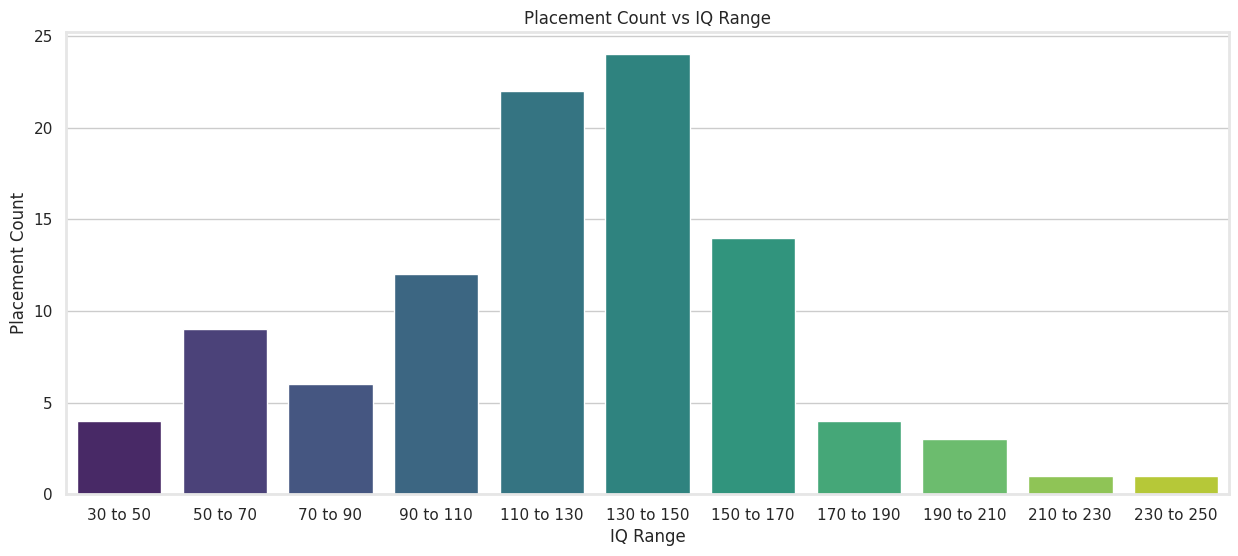

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

IQ_counts = placement_df.groupby('iq-range')['placement'].count().reset_index()
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid", rc={"axes.edgecolor": "0.9", "axes.linewidth": 2})
ax = sns.barplot(x='iq-range', y='placement', data=IQ_counts, palette='viridis')
plt.xlabel('IQ Range')
plt.ylabel('Placement Count')
plt.title('Placement Count vs IQ Range')
plt.show()


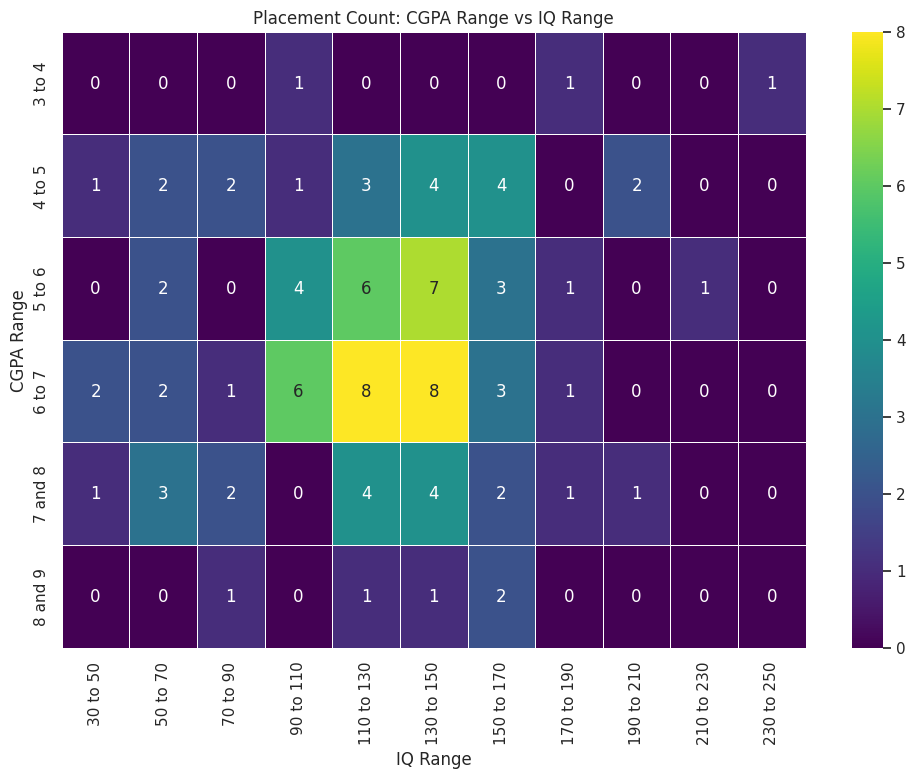

In [101]:
plt.figure(figsize=(12, 8))
heatmap_data = pd.crosstab(placement_df['cpga_range'], placement_df['iq-range'])
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.xlabel('IQ Range')
plt.ylabel('CGPA Range')
plt.title('Placement Count: CGPA Range vs IQ Range')
plt.show()

In [102]:
placement_df

,Unnamed: 0,cgpa,iq,placement,cpga_range,iq-range
0,0,6.8,123.0,1,6 to 7,110 to 130
1,1,5.9,106.0,0,5 to 6,90 to 110
2,2,5.3,121.0,0,5 to 6,110 to 130
3,3,7.4,132.0,1,7 and 8,130 to 150
4,4,5.8,142.0,0,5 to 6,130 to 150
...,...,...,...,...,...,...
95,95,4.3,200.0,0,4 to 5,190 to 210
96,96,4.4,42.0,0,4 to 5,30 to 50
97,97,6.7,182.0,1,6 to 7,170 to 190
98,98,6.3,103.0,1,6 to 7,90 to 110


In [ ]:
#conclusion:-
#there is no effect on high iq of a student it seems that as their iq is high but they are not able to grab any placement